# CS418 Final Project: Energy Usage
## Arpita Kumari, Kaveesha Weerasiri, Reem Hussein
Description: The problem we will be focusing on is to predict the total kWh in Chicago in 2010 for different communities. We want to see what communities have the highest total kWh in Chicago based on the total units.

In [31]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#importing the data set
energy_data = pd.read_csv("energy_usage.csv")
energy_data.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [21]:
# clean up the data
energy_data.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,...,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,...,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,...,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703116e+14,1.370000e+03,1.613000e+03,1.586000e+03,1.579000e+03,1.957000e+03,2.700000e+03,3.203000e+03,2.837750e+03,2.027000e+03,...,37.000000,15.000000,1.140000,53.000000,2.150000,13.000000,0.833200,3.000000,0.286000,13.000000
50%,1.703133e+14,3.481500e+03,3.814000e+03,3.681500e+03,3.646000e+03,4.528000e+03,6.295000e+03,7.389000e+03,6.413500e+03,4.573000e+03,...,64.000000,25.000000,1.750000,80.000000,2.700000,22.000000,0.914600,11.000000,0.537900,22.000000
75%,1.703167e+14,7.157000e+03,7.410250e+03,7.059000e+03,7.010000e+03,8.943500e+03,1.282850e+04,1.465750e+04,1.229800e+04,8.634000e+03,...,105.000000,42.000000,2.000000,96.500000,3.320000,37.000000,0.967700,23.000000,0.733000,37.000000
max,1.703198e+14,5.298534e+07,4.787976e+07,4.413646e+07,4.222055e+07,4.861925e+07,5.256908e+07,5.513983e+07,5.158912e+07,4.450386e+07,...,67388.000000,51372.000000,110.000000,158.000000,2061.920000,43222.000000,1.000000,28335.000000,1.000000,43222.000000


In [27]:
energy_data.dtypes

COMMUNITY AREA NAME                    object
CENSUS BLOCK                          float64
BUILDING TYPE                          object
BUILDING_SUBTYPE                       object
KWH JANUARY 2010                      float64
                                       ...   
OCCUPIED UNITS                        float64
OCCUPIED UNITS PERCENTAGE             float64
RENTER-OCCUPIED HOUSING UNITS         float64
RENTER-OCCUPIED HOUSING PERCENTAGE    float64
OCCUPIED HOUSING UNITS                float64
Length: 73, dtype: object

In [20]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
COMMUNITY AREA NAME                    67051 non-null object
CENSUS BLOCK                           66974 non-null float64
BUILDING TYPE                          66974 non-null object
BUILDING_SUBTYPE                       66974 non-null object
KWH JANUARY 2010                       66180 non-null float64
KWH FEBRUARY 2010                      66180 non-null float64
KWH MARCH 2010                         66180 non-null float64
KWH APRIL 2010                         66180 non-null float64
KWH MAY 2010                           66180 non-null float64
KWH JUNE 2010                          66180 non-null float64
KWH JULY 2010                          66180 non-null float64
KWH AUGUST 2010                        66180 non-null float64
KWH SEPTEMBER 2010                     66180 non-null float64
KWH OCTOBER 2010                       66180 non-null float64
KWH NOVEMBER 2010         

In [21]:
print('Number of missing values per column:')
missing_values = energy_data.isin([0]).sum()
missing_values[0:9]

Number of missing values per column:


COMMUNITY AREA NAME       0
CENSUS BLOCK              0
BUILDING TYPE             0
BUILDING_SUBTYPE          0
KWH JANUARY 2010       3069
KWH FEBRUARY 2010      1359
KWH MARCH 2010         1036
KWH APRIL 2010          865
KWH MAY 2010            683
dtype: int64

In [9]:
missing_values[9:18]

KWH JUNE 2010           542
KWH JULY 2010           427
KWH AUGUST 2010         314
KWH SEPTEMBER 2010      206
KWH OCTOBER 2010        108
KWH NOVEMBER 2010        50
KWH DECEMBER 2010        41
TOTAL KWH                 0
ELECTRICITY ACCOUNTS      0
dtype: int64

In [10]:
missing_values[18:27]

ZERO KWH ACCOUNTS      14965
THERM JANUARY 2010         0
THERM FEBRUARY 2010        0
THERM MARCH 2010           0
TERM APRIL 2010            0
THERM MAY 2010             0
THERM JUNE 2010            0
THERM JULY 2010            0
THERM AUGUST 2010          0
dtype: int64

In [13]:
missing_values[27:36]

THERM SEPTEMBER 2010    0
THERM OCTOBER 2010      0
THERM NOVEMBER 2010     0
THERM DECEMBER 2010     0
TOTAL THERMS            0
GAS ACCOUNTS            0
KWH TOTAL SQFT          0
THERMS TOTAL SQFT       0
KWH MEAN 2010           0
dtype: int64

In [14]:
missing_values[36:45]

KWH STANDARD DEVIATION 2010          12
KWH MINIMUM 2010                      0
KWH 1ST QUARTILE 2010                 0
KWH 2ND QUARTILE 2010                 0
KWH 3RD QUARTILE 2010                 0
KWH MAXIMUM 2010                      0
KWH SQFT MEAN 2010                    0
KWH SQFT STANDARD DEVIATION 2010    866
KWH SQFT MINIMUM 2010                 0
dtype: int64

In [15]:
missing_values[45:54]

KWH SQFT 1ST QUARTILE 2010        0
KWH SQFT 2ND QUARTILE 2010        0
KWH SQFT 3RD QUARTILE 2010        0
KWH SQFT MAXIMUM 2010             0
THERM MEAN 2010                   0
THERM STANDARD DEVIATION 2010    18
THERM MINIMUM 2010                0
THERM 1ST QUARTILE 2010           0
THERM 2ND QUARTILE 2010           0
dtype: int64

In [16]:
missing_values[54:63]

THERM 3RD QUARTILE 2010                  0
THERM MAXIMUM 2010                       0
THERMS SQFT MEAN 2010                    0
THERMS SQFT STANDARD DEVIATION 2010    883
THERMS SQFT MINIMUM 2010                 0
THERMS SQFT 1ST QUARTILE 2010            0
THERMS SQFT 2ND QUARTILE 2010            0
THERMS SQFT 3RD QUARTILE 2010            0
THERMS SQFT MAXIMUM 2010                 0
dtype: int64

In [18]:
missing_values[63:73]

TOTAL POPULATION                      2525
TOTAL UNITS                           2431
AVERAGE STORIES                          0
AVERAGE BUILDING AGE                  5309
AVERAGE HOUSESIZE                     2604
OCCUPIED UNITS                        2604
OCCUPIED UNITS PERCENTAGE              173
RENTER-OCCUPIED HOUSING UNITS         6726
RENTER-OCCUPIED HOUSING PERCENTAGE    4122
OCCUPIED HOUSING UNITS                2604
dtype: int64

## There are missing values for the following columns

KWH JANUARY 2010                      3069

KWH FEBRUARY 2010                     1359

KWH MARCH 2010                        1036

KWH APRIL 2010                         865

KWH MAY 2010                           683

KWH JUNE 2010                          542

KWH JULY 2010                          427

KWH AUGUST 2010                        314

KWH SEPTEMBER 2010                     206

KWH OCTOBER 2010                       108

KWH NOVEMBER 2010                       50

KWH DECEMBER 2010                       41

ZERO KWH ACCOUNTS                    14965

KWH STANDARD DEVIATION 2010             12

KWH SQFT STANDARD DEVIATION 2010       866

THERM STANDARD DEVIATION 2010           18

THERMS SQFT STANDARD DEVIATION 2010    883

TOTAL POPULATION                      2525

TOTAL UNITS                           2431

AVERAGE BUILDING AGE                  5309

AVERAGE HOUSESIZE                     2604

OCCUPIED UNITS                        2604

OCCUPIED UNITS PERCENTAGE              173

RENTER-OCCUPIED HOUSING UNITS         6726

RENTER-OCCUPIED HOUSING PERCENTAGE    4122

OCCUPIED HOUSING UNITS                2604

'ZERO KWH ACCOUNTS' variable should be removed from the data set, because more than a fifth of the values are missing. We can't remove the observations since there are so many missing, so we should just remove the variable to work with the information. We removed the rest of the observations that had NA as a value.

In [22]:
energy_data = energy_data.drop('ZERO KWH ACCOUNTS',  axis=1)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
energy_data.dropna()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
103,Lincoln Park,1.703107e+14,Residential,Multi 7+,242.0,136.0,134.0,134.0,144.0,122.0,...,61.0,22.0,4.00,12.00,2.77,22.0,1.0000,11.0,0.5000,22.0
201,South Shore,1.703143e+14,Residential,Multi < 7,1266.0,1023.0,897.0,772.0,826.0,1095.0,...,224.0,159.0,2.50,114.50,1.62,138.0,0.8679,106.0,0.7680,138.0
259,Albany Park,1.703114e+14,Residential,Multi 7+,11921.0,12145.0,9759.0,11542.0,14348.0,26617.0,...,132.0,64.0,3.00,65.50,2.20,60.0,0.9375,33.0,0.5500,60.0
279,Brighton Park,1.703158e+14,Residential,Multi < 7,3271.0,2117.0,1520.0,3073.0,3350.0,5737.0,...,95.0,22.0,2.00,84.00,5.00,19.0,0.8636,4.0,0.2110,19.0
297,Englewood,1.703168e+14,Residential,Multi < 7,399.0,878.0,819.0,962.0,2414.0,1759.0,...,59.0,22.0,2.00,108.00,4.21,14.0,0.6364,8.0,0.5710,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67045,Woodlawn,1.703184e+14,Residential,Multi < 7,9572.0,9104.0,8525.0,7756.0,11256.0,11669.0,...,116.0,55.0,2.00,51.90,3.14,37.0,0.6727,26.0,0.7030,37.0
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.7030,37.0
67047,Woodlawn,1.703184e+14,Commercial,Multi < 7,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,...,31.0,24.0,3.00,104.50,2.07,15.0,0.6250,13.0,0.8670,15.0
67048,Woodlawn,1.703184e+14,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,...,31.0,24.0,2.33,100.67,2.07,15.0,0.6250,13.0,0.8670,15.0


In [23]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
pd.get_dummies(energy_data)

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,GAS ACCOUNTS_91,GAS ACCOUNTS_92,GAS ACCOUNTS_93,GAS ACCOUNTS_94,GAS ACCOUNTS_95,GAS ACCOUNTS_96,GAS ACCOUNTS_97,GAS ACCOUNTS_98,GAS ACCOUNTS_99,GAS ACCOUNTS_Less than 4
0,1.703157e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1.703170e+14,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,...,0,0,0,0,0,0,0,0,0,0
2,1.703171e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1.703125e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1.703125e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67046,1.703184e+14,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,2449.0,2351.0,1213.0,...,0,0,0,0,0,0,0,0,0,0
67047,1.703184e+14,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,3018.0,3030.0,2886.0,...,0,0,0,0,0,0,0,0,0,0
67048,1.703184e+14,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,5773.0,3996.0,3050.0,...,0,0,0,0,0,0,0,0,0,0
67049,1.703184e+14,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,1569.0,1551.0,1376.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
print("Summary statistics for all numerical features")
energy_data.describe(include=['number'])

Summary statistics for all numerical features


,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,...,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,...,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,...,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703116e+14,1.370000e+03,1.613000e+03,1.586000e+03,1.579000e+03,1.957000e+03,2.700000e+03,3.203000e+03,2.837750e+03,2.027000e+03,...,37.000000,15.000000,1.140000,53.000000,2.150000,13.000000,0.833200,3.000000,0.286000,13.000000
50%,1.703133e+14,3.481500e+03,3.814000e+03,3.681500e+03,3.646000e+03,4.528000e+03,6.295000e+03,7.389000e+03,6.413500e+03,4.573000e+03,...,64.000000,25.000000,1.750000,80.000000,2.700000,22.000000,0.914600,11.000000,0.537900,22.000000
75%,1.703167e+14,7.157000e+03,7.410250e+03,7.059000e+03,7.010000e+03,8.943500e+03,1.282850e+04,1.465750e+04,1.229800e+04,8.634000e+03,...,105.000000,42.000000,2.000000,96.500000,3.320000,37.000000,0.967700,23.000000,0.733000,37.000000
max,1.703198e+14,5.298534e+07,4.787976e+07,4.413646e+07,4.222055e+07,4.861925e+07,5.256908e+07,5.513983e+07,5.158912e+07,4.450386e+07,...,67388.000000,51372.000000,110.000000,158.000000,2061.920000,43222.000000,1.000000,28335.000000,1.000000,43222.000000


In [28]:
print("Summary statistics for all categorical features")
energy_data.describe(exclude=['number'])

Summary statistics for all categorical features


,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,ELECTRICITY ACCOUNTS,GAS ACCOUNTS
count,67051,66974,66974,66180,65755
unique,77,3,6,378,210
top,West Town,Residential,Multi < 7,Less than 4,Less than 4
freq,2869,49747,27284,11817,12577


<AxesSubplot:xlabel='COMMUNITY AREA NAME', ylabel='TOTAL KWH'>

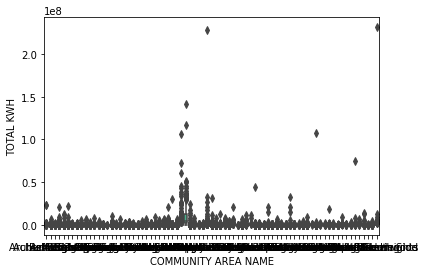

In [37]:
sns.boxplot(x="COMMUNITY AREA NAME", y=energy_data['TOTAL KWH'], data=energy_data)

(array([14553., 11315., 12141., 10882., 12793.,  5290.]),
 array([ 0.        , 12.66666667, 25.33333333, 38.        , 50.66666667,
        63.33333333, 76.        ]),
 <BarContainer object of 6 artists>)

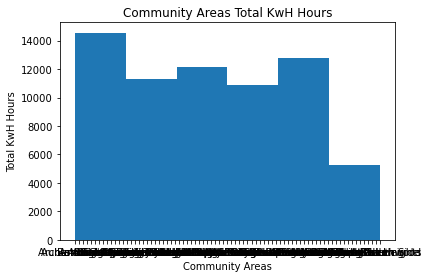

In [51]:
plt.title('Community Areas Total KwH Hours')
plt.xlabel('Community Areas')
plt.ylabel('Total KwH Hours')
plt.hist(energy_data['COMMUNITY AREA NAME'], bins = 6)

In [30]:
# energy_data = energy_data.dropna(subset=['CENSUS BLOCK'])
# energy_data['CENSUS BLOCK'] = energy_data['CENSUS BLOCK'].astype(int)
# areas = energy_data['CENSUS BLOCK'].tolist()
# total_kwh = energy_data['TOTAL KWH'].tolist()
# figure = ff.create_choropleth(fips = areas, 
#                               values = total_kwh,
#                               title = "Total KWH used by census block",
#                               legend_title = "census block"
#                              )
# figure.layout.template = None
# figure.show()